In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stock_df = pd.read_csv('bdm_stock_data.csv')

In [ ]:
stock_df = stock_df.iloc[:742]
stock_df.dropna(inplace=True)

def clean_quantity(value):
    try:
        numeric_value = ''.join([char for char in str(value) if char.isdigit() or char == '.'])
        return float(numeric_value)
    except:
        return None

stock_df['Quantity_Opening_Balance'] = stock_df['Quantity_Opening_Balance'].apply(clean_quantity)
stock_df['Quantity_Inwards'] = stock_df['Quantity_Inwards'].apply(clean_quantity)
stock_df['Quantity_Outwards'] = stock_df['Quantity_Outwards'].apply(clean_quantity)
stock_df['Quantity_Closing_Balance'] = stock_df['Quantity_Closing_Balance'].apply(clean_quantity)

stock_df.describe()

,Quantity_Opening_Balance,Rate_Opening_Balance,Value_Opening_Balance,Quantity_Inwards,Rate_Inwards,Value_Inwards,Quantity_Outwards,Rate_Outwards,Value_Outwards,Quantity_Closing_Balance,Rate_Closing_Balance,Value_Closing_Balance
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,41.837302,1823.599444,17232.959524,18.297619,1968.339444,9218.864841,11.809524,2486.610754,10802.089048,48.325397,1727.779603,18410.025635
std,158.912669,3460.176822,39232.631980,59.341160,3896.201226,17642.618689,38.460766,3753.715860,27618.241442,180.013184,3304.385070,35602.066164
min,1.000000,6.920000,74.880000,1.000000,10.500000,53.390000,1.000000,18.980000,75.000000,0.000000,0.000000,0.000000
25%,2.000000,194.507500,1705.037500,2.000000,235.820000,1128.997500,1.000000,471.392500,1557.355000,3.000000,206.112500,2371.530000
50%,8.000000,787.000000,5111.365000,4.000000,853.775000,3402.560000,3.000000,1525.435000,3864.885000,8.000000,797.590000,5961.240000
75%,22.000000,2269.095000,17136.812500,12.000000,2140.795000,9566.757500,7.000000,3204.097500,10000.000000,25.000000,2062.122500,19725.697500
max,1502.000000,33240.650000,329903.440000,560.000000,33633.450000,197508.640000,409.000000,39453.130000,279155.740000,1662.000000,33166.540000,281618.690000


In [ ]:
stock_df.columns

Index(['Particulars', 'Quantity_Opening_Balance', 'Rate_Opening_Balance',
       'Value_Opening_Balance', 'Quantity_Inwards', 'Rate_Inwards',
       'Value_Inwards', 'Quantity_Outwards', 'Rate_Outwards', 'Value_Outwards',
       'Quantity_Closing_Balance', 'Rate_Closing_Balance',
       'Value_Closing_Balance'],
      dtype='object')

In [ ]:
df = stock_df
df['Particulars'] = df['Particulars'].str.rstrip('.')

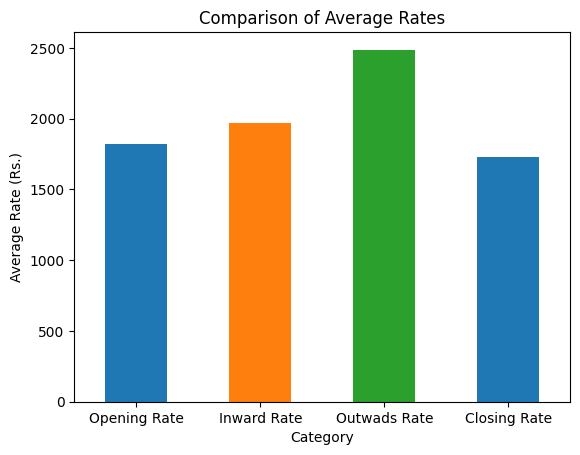

In [ ]:
#Comparison of Average Rates
average_rates= {
    'Opening Rate': stock_df['Rate_Opening_Balance'].mean(),
    'Inward Rate': stock_df['Rate_Inwards'].mean(),
    'Outwads Rate': stock_df['Rate_Outwards'].mean(),
    'Closing Rate': stock_df['Rate_Closing_Balance'].mean()
}
pd.Series(average_rates).plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], rot=0)
plt.xlabel('Category')
plt.ylabel('Average Rate (Rs.)')
plt.title('Comparison of Average Rates')
plt.show()

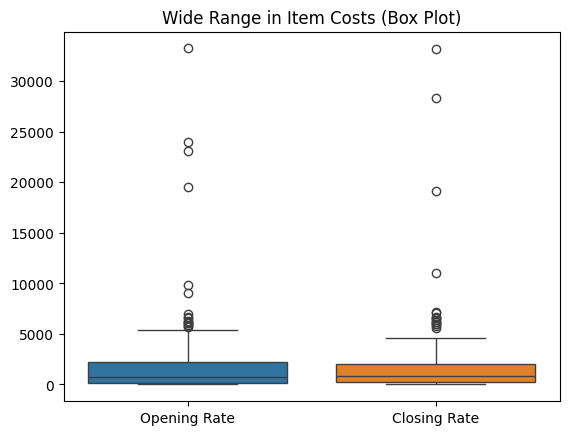

In [ ]:
# Wide Range in Item Costs (Box plot for Item Cost Distribution)
sns.boxplot(data=[stock_df['Rate_Opening_Balance'], stock_df['Rate_Closing_Balance']])
plt.xticks([0, 1], ['Opening Rate', 'Closing Rate'])
plt.title('Wide Range in Item Costs (Box Plot)')
plt.show()

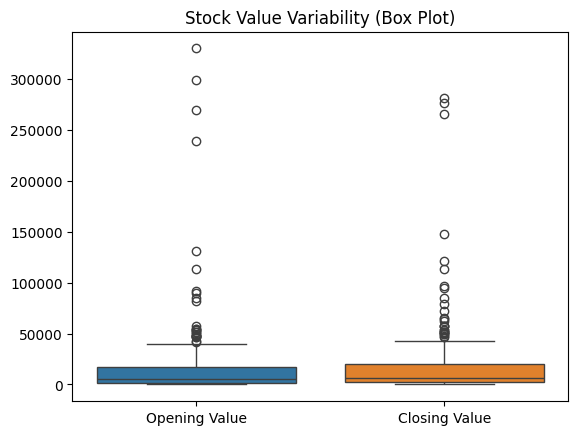

In [ ]:
# Stock Value Variability (Box plot for Stock Value Distribution)
sns.boxplot(data=[stock_df['Value_Opening_Balance'], stock_df['Value_Closing_Balance']])
plt.xticks([0, 1], ['Opening Value', 'Closing Value'])
plt.title('Stock Value Variability (Box Plot)')
plt.show()

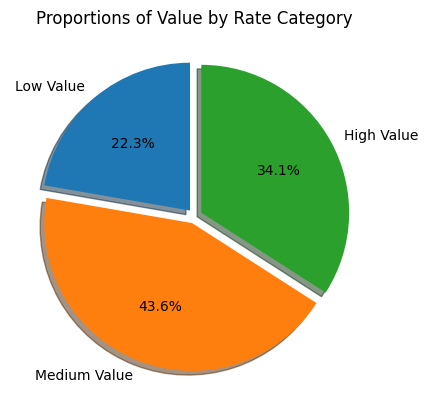

In [ ]:
low_value = stock_df[stock_df['Rate_Opening_Balance'] < 1000]['Value_Opening_Balance'].sum()
medium_value = stock_df[(stock_df['Rate_Opening_Balance'] >= 1000) & (stock_df['Rate_Opening_Balance'] < 5000)]['Value_Opening_Balance'].sum()
high_value = stock_df[stock_df['Rate_Opening_Balance'] >= 5000]['Value_Opening_Balance'].sum()

# Data for the pie chart
rate_category_data = {'Low Value': low_value, 'Medium Value': medium_value, 'High Value': high_value}

# Plotting the pie chart
plt.pie(rate_category_data.values(), labels=rate_category_data.keys(), autopct='%1.1f%%', startangle=90,
        shadow=True, explode=(0.05, 0.05, 0.05))
plt.title('Proportions of Value by Rate Category')
plt.show()


In [ ]:
total_quantity_inwards = df['Quantity_Inwards'].sum()
total_quantity_outwards = df['Quantity_Outwards'].sum()
inward_outward_ratio = total_quantity_inwards / total_quantity_outwards
inward_outward_ratio

1.5493951612903225

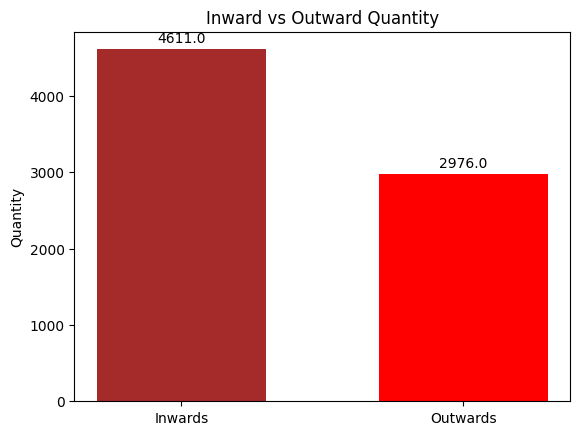

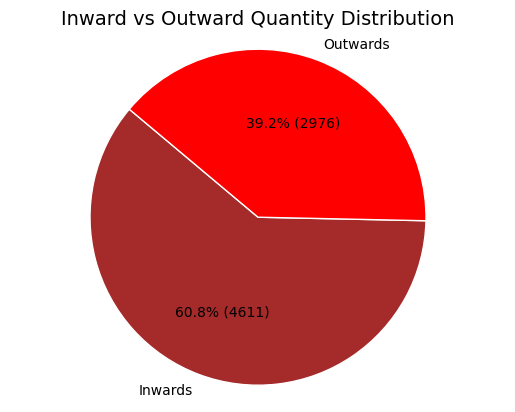

In [ ]:
import matplotlib.pyplot as plt
categories = ['Inwards', 'Outwards']
values = [total_quantity_inwards, total_quantity_outwards]

plt.bar(categories, values, color=['brown', 'red'], width=0.6)
plt.title('Inward vs Outward Quantity')
plt.ylabel('Quantity')

for i, value in enumerate(values):
    plt.text(i, value + 50, f'{value}', ha='center', va='bottom')

plt.show()
plt.pie(values, labels=categories, autopct=lambda p: f'{p:.1f}% ({p * sum(values) / 100:.0f})', startangle=140, colors=['brown', 'red'], wedgeprops={'edgecolor': 'white'})
plt.title('Inward vs Outward Quantity Distribution', fontsize=14)
plt.axis('equal')
plt.show()


In [ ]:
total_quantity_closing = df['Quantity_Closing_Balance'].sum()
net_quantity_change = total_quantity_closing - df['Quantity_Opening_Balance'].sum()
net_quantity_change

1635.0

# OverStocking or Slow Moving Items

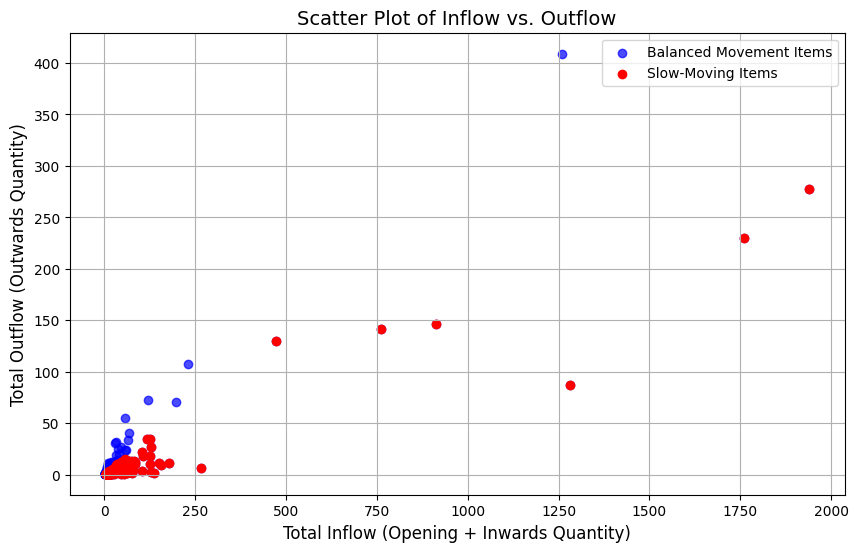

In [ ]:
# Calculate total inflow and imbalance
df['Total_Inflow'] = df['Quantity_Opening_Balance'] + df['Quantity_Inwards']
df['Imbalance'] = df['Total_Inflow'] - df['Quantity_Outwards']

# Define a threshold for "low performance"
threshold_ratio = 0.3
df['Performance_Ratio'] = df['Quantity_Outwards'] / (df['Total_Inflow'] + 1e-5)

# Filter slow-moving items
slow_moving = df[df['Performance_Ratio'] < threshold_ratio]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Inflow'], df['Quantity_Outwards'], alpha=0.7, color='blue', label='Balanced Movement Items')
plt.scatter(slow_moving['Total_Inflow'], slow_moving['Quantity_Outwards'], color='red', label='Slow-Moving Items')

plt.xlabel('Total Inflow (Opening + Inwards Quantity)', fontsize=12)
plt.ylabel('Total Outflow (Outwards Quantity)', fontsize=12)
plt.title('Scatter Plot of Inflow vs. Outflow', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# slow_moving.to_csv('slow_moving_items.csv', index=False)

In [ ]:
slow_moving

,Particulars,Quantity_Opening_Balance,Rate_Opening_Balance,Value_Opening_Balance,Quantity_Inwards,Rate_Inwards,Value_Inwards,Quantity_Outwards,Rate_Outwards,Value_Outwards,Quantity_Closing_Balance,Rate_Closing_Balance,Value_Closing_Balance,Total_Inflow,Imbalance,Performance_Ratio
4,05274/1(Piston Koel 4rv 1040),14.0,1038.50,14539.04,8.0,1199.20,9593.60,4.0,2109.38,8437.50,18.0,1096.94,19744.89,22.0,18.0,0.181818
6,06.631.02.0.00 Valve Seal. Ha-494,42.0,71.76,3013.79,16.0,80.83,1293.30,8.0,84.25,674.00,50.0,74.26,3713.01,58.0,50.0,0.137931
9,1003 SEALING RING GLENN DORI (1612),24.0,94.00,2256.10,10.0,134.08,1340.80,3.0,214.85,644.54,31.0,105.79,3279.53,34.0,31.0,0.088235
11,1003 Tata 697 Sealing Ring (1612),46.0,124.87,5744.14,19.0,131.25,2493.74,3.0,196.60,589.80,62.0,126.74,7857.67,65.0,62.0,0.046154
15,13417 Piston Set Tc E-111,8.0,5915.91,47327.24,1.0,6541.42,6541.42,1.0,10000.00,10000.00,8.0,5985.41,47883.25,9.0,8.0,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,S.E. BUSH HINO,48.0,87.42,4196.08,6.0,116.68,700.09,1.0,1229.00,1229.00,53.0,90.67,4805.50,54.0,53.0,0.018519
712,Spring Washer Kit Alsan (1612),113.0,47.38,5354.36,12.0,60.01,720.06,10.0,183.05,1830.52,115.0,48.60,5588.47,125.0,115.0,0.080000
720,Timing Cover Packing TC (Xps),32.0,92.68,2965.69,2.0,231.05,462.10,4.0,432.22,1728.89,30.0,100.82,3024.52,34.0,30.0,0.117647
721,Tw 262 (1to 2nd)Thrust Washer 697,14.0,139.29,1950.10,4.0,144.07,576.26,1.0,335.00,335.00,17.0,140.35,2386.01,18.0,17.0,0.055556


### Comparing Overstock with Regular Items

In [ ]:
total_items_df = df
overstock_items_df = slow_moving

In [ ]:
regular_items_df = total_items_df[~total_items_df['Particulars'].isin(overstock_items_df['Particulars'])]


In [ ]:
# Descriptive Analysis
# Metrics to compute
metrics = ['Quantity_Closing_Balance', 'Rate_Closing_Balance', 'Value_Closing_Balance']

# Compute averages and standard deviations for both groups
overstock_summary = overstock_items_df[metrics].agg(['mean', 'std', 'sum'])
regular_summary = regular_items_df[metrics].agg(['mean', 'std', 'sum'])

# Combine into a summary table
comparison_df = pd.concat(
    [overstock_summary.rename(columns=lambda x: f"Overstock_{x}"),
     regular_summary.rename(columns=lambda x: f"Regular_{x}")],
    axis=1
)

print("Comparison of Overstocked vs Regular Items")
comparison_df


Comparison of Overstocked vs Regular Items


,Overstock_Quantity_Closing_Balance,Overstock_Rate_Closing_Balance,Overstock_Value_Closing_Balance,Regular_Quantity_Closing_Balance,Regular_Rate_Closing_Balance,Regular_Value_Closing_Balance
mean,71.287671,1663.724384,2.393404e+04,16.698113,1816.006604,1.080147e+04
std,223.058024,3185.628753,3.962459e+04,83.729857,3474.727192,2.758314e+04
sum,10408.000000,242903.760000,3.494371e+06,1770.000000,192496.700000,1.144956e+06


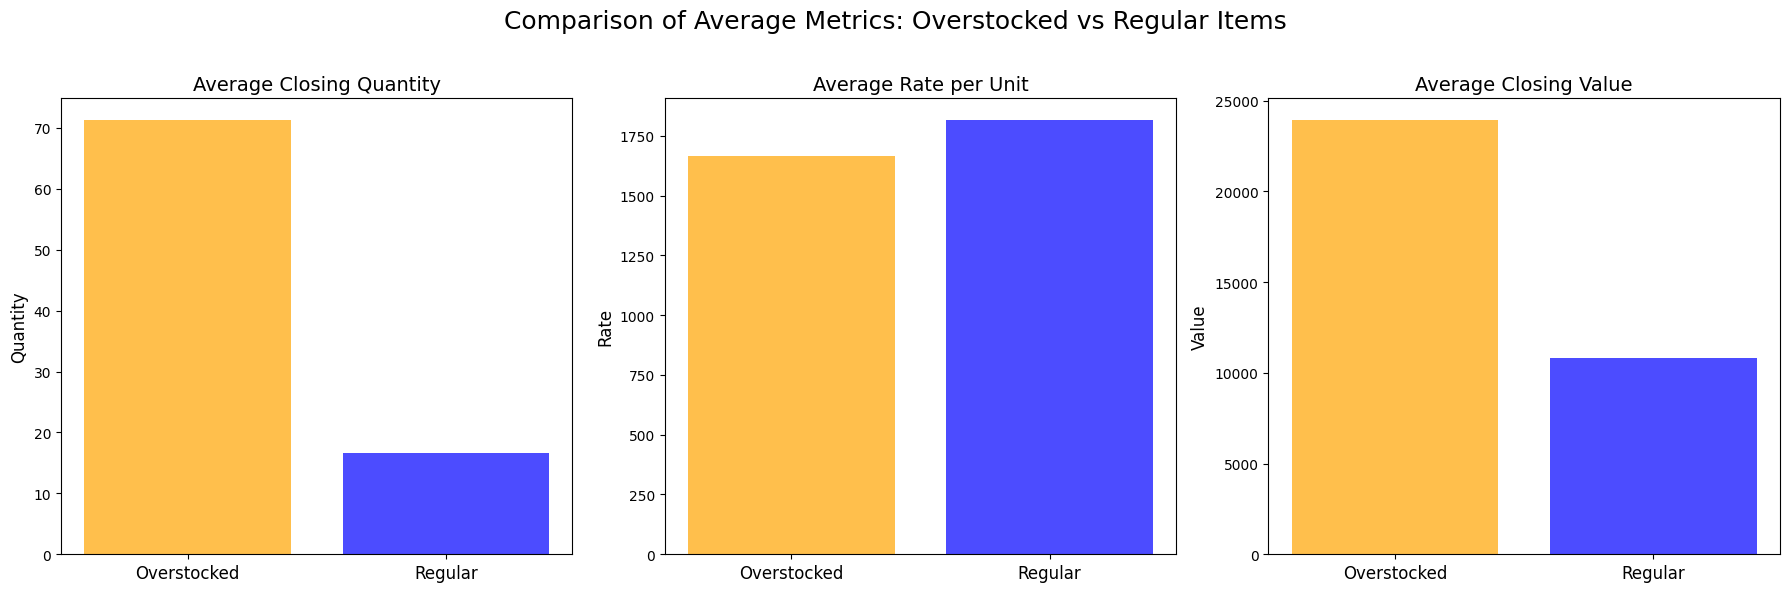

In [ ]:
# Prepare data for plots
labels = ['Closing Quantity', 'Rate per Unit', 'Closing Value']
overstock_means = overstock_summary.loc['mean'].values
regular_means = regular_summary.loc['mean'].values

# Create three bar charts for each category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Closing Quantity
axes[0].bar(['Overstocked', 'Regular'], [overstock_means[0], regular_means[0]], color=['orange', 'blue'], alpha=0.7)
axes[0].set_title('Average Closing Quantity', fontsize=14)
axes[0].set_ylabel('Quantity', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12)

# Plot for Rate per Unit
axes[1].bar(['Overstocked', 'Regular'], [overstock_means[1], regular_means[1]], color=['orange', 'blue'], alpha=0.7)
axes[1].set_title('Average Rate per Unit', fontsize=14)
axes[1].set_ylabel('Rate', fontsize=12)
axes[1].tick_params(axis='x', labelsize=12)

# Plot for Closing Value
axes[2].bar(['Overstocked', 'Regular'], [overstock_means[2], regular_means[2]], color=['orange', 'blue'], alpha=0.7)
axes[2].set_title('Average Closing Value', fontsize=14)
axes[2].set_ylabel('Value', fontsize=12)
axes[2].tick_params(axis='x', labelsize=12)

plt.suptitle('Comparison of Average Metrics: Overstocked vs Regular Items', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

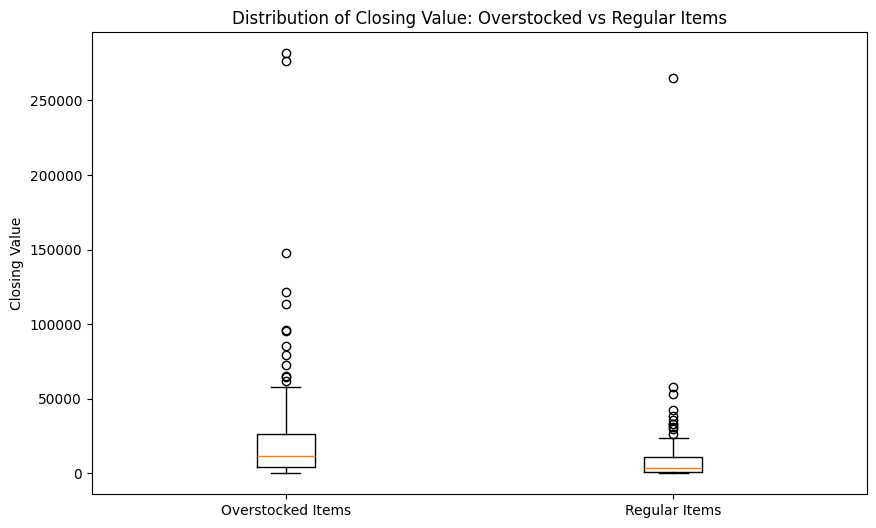

In [ ]:
# Box Plot for Closing Value Distribution
plt.figure(figsize=(10, 6))
plt.boxplot(
    [overstock_items_df['Value_Closing_Balance'], regular_items_df['Value_Closing_Balance']],
    labels=['Overstocked Items', 'Regular Items']
)
plt.ylabel('Closing Value')
plt.title('Distribution of Closing Value: Overstocked vs Regular Items')
plt.show()


### Overstock Clearance Prioritization and Deadstock Risk Analysis

In [ ]:
# 1. Calculate Clearance Priority Score
# Weights for attributes
weights = {'value': 0.5, 'quantity': 0.3, 'rate': 0.2}

# Normalize the attributes
overstock_items_df['Value_Normalized'] = overstock_items_df['Value_Closing_Balance'] / overstock_items_df['Value_Closing_Balance'].max()
overstock_items_df['Quantity_Normalized'] = overstock_items_df['Quantity_Closing_Balance'] / overstock_items_df['Quantity_Closing_Balance'].max()
overstock_items_df['Rate_Normalized'] = overstock_items_df['Rate_Closing_Balance'] / overstock_items_df['Rate_Closing_Balance'].max()

# Calculate the clearance priority score
overstock_items_df['Clearance_Priority_Score'] = (
    weights['value'] * overstock_items_df['Value_Normalized'] +
    weights['quantity'] * overstock_items_df['Quantity_Normalized'] +
    weights['rate'] * overstock_items_df['Rate_Normalized']
)
overstock_items_df

,Particulars,Quantity_Opening_Balance,Rate_Opening_Balance,Value_Opening_Balance,Quantity_Inwards,Rate_Inwards,Value_Inwards,Quantity_Outwards,Rate_Outwards,Value_Outwards,Quantity_Closing_Balance,Rate_Closing_Balance,Value_Closing_Balance,Total_Inflow,Imbalance,Performance_Ratio,Value_Normalized,Quantity_Normalized,Rate_Normalized,Clearance_Priority_Score
4,05274/1(Piston Koel 4rv 1040),14.0,1038.50,14539.04,8.0,1199.20,9593.60,4.0,2109.38,8437.50,18.0,1096.94,19744.89,22.0,18.0,0.181818,0.070112,0.010830,0.038641,0.046033
6,06.631.02.0.00 Valve Seal. Ha-494,42.0,71.76,3013.79,16.0,80.83,1293.30,8.0,84.25,674.00,50.0,74.26,3713.01,58.0,50.0,0.137931,0.013185,0.030084,0.002616,0.016141
9,1003 SEALING RING GLENN DORI (1612),24.0,94.00,2256.10,10.0,134.08,1340.80,3.0,214.85,644.54,31.0,105.79,3279.53,34.0,31.0,0.088235,0.011645,0.018652,0.003727,0.012164
11,1003 Tata 697 Sealing Ring (1612),46.0,124.87,5744.14,19.0,131.25,2493.74,3.0,196.60,589.80,62.0,126.74,7857.67,65.0,62.0,0.046154,0.027902,0.037304,0.004465,0.026035
15,13417 Piston Set Tc E-111,8.0,5915.91,47327.24,1.0,6541.42,6541.42,1.0,10000.00,10000.00,8.0,5985.41,47883.25,9.0,8.0,0.111111,0.170029,0.004813,0.210844,0.128627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,S.E. BUSH HINO,48.0,87.42,4196.08,6.0,116.68,700.09,1.0,1229.00,1229.00,53.0,90.67,4805.50,54.0,53.0,0.018519,0.017064,0.031889,0.003194,0.018738
712,Spring Washer Kit Alsan (1612),113.0,47.38,5354.36,12.0,60.01,720.06,10.0,183.05,1830.52,115.0,48.60,5588.47,125.0,115.0,0.080000,0.019844,0.069194,0.001712,0.031023
720,Timing Cover Packing TC (Xps),32.0,92.68,2965.69,2.0,231.05,462.10,4.0,432.22,1728.89,30.0,100.82,3024.52,34.0,30.0,0.117647,0.010740,0.018051,0.003552,0.011495
721,Tw 262 (1to 2nd)Thrust Washer 697,14.0,139.29,1950.10,4.0,144.07,576.26,1.0,335.00,335.00,17.0,140.35,2386.01,18.0,17.0,0.055556,0.008472,0.010229,0.004944,0.008294


In [ ]:
# 2. Calculate Deadstock Risk Score
# Define movement and calculate normalized values
overstock_items_df['Movement'] = overstock_items_df['Quantity_Outwards'] / (overstock_items_df['Quantity_Inwards'] + overstock_items_df['Quantity_Opening_Balance'])
overstock_items_df['Movement_Normalized'] = overstock_items_df['Movement'] / overstock_items_df['Movement'].max()

# Higher deadstock risk for high closing balance and low movement
overstock_items_df['Deadstock_Risk_Score'] = (
    0.6 * (1 - overstock_items_df['Movement_Normalized']) +  # Low movement contributes more
    0.4 * overstock_items_df['Quantity_Normalized']          # High quantity contributes moderately
)


In [ ]:
# 3. Rank items based on scores
overstock_items_df['Clearance_Priority_Rank'] = overstock_items_df['Clearance_Priority_Score'].rank(ascending=False)
overstock_items_df['Deadstock_Risk_Rank'] = overstock_items_df['Deadstock_Risk_Score'].rank(ascending=False)

overstock_items_df.sort_values(by='Clearance_Priority_Score', ascending=False, inplace=True)

overstock_items_df


,Particulars,Quantity_Opening_Balance,Rate_Opening_Balance,Value_Opening_Balance,Quantity_Inwards,Rate_Inwards,Value_Inwards,Quantity_Outwards,Rate_Outwards,Value_Outwards,...,Performance_Ratio,Value_Normalized,Quantity_Normalized,Rate_Normalized,Clearance_Priority_Score,Movement,Movement_Normalized,Deadstock_Risk_Score,Clearance_Priority_Rank,Deadstock_Risk_Rank
69,5292544 Piston Engine Set E-111,47.0,7019.22,329903.44,2.0,7539.73,15079.45,9.0,8513.66,76622.93,...,0.183673,1.000000,0.024067,0.248010,0.556822,0.183673,0.612245,0.242280,1.0,88.0
178,Fi941106 Ring Set Mpr Moly Super E-TC,71.0,3796.34,269539.89,14.0,3758.09,52613.25,12.0,4488.96,53867.49,...,0.141176,0.982437,0.043923,0.133509,0.531097,0.141176,0.470588,0.335216,2.0,63.0
627,Loctite /Anabond 85 G,1068.0,79.11,84484.30,213.0,82.67,17609.70,87.0,131.57,11446.37,...,0.067916,0.337904,0.718412,0.002808,0.385037,0.067916,0.226386,0.751533,3.0,1.0
25,2 CYLINDER HEAD,2.0,23142.21,46284.41,2.0,33633.45,67266.89,1.0,23046.88,23046.88,...,0.249999,0.302407,0.001805,1.000000,0.351745,0.250000,0.833333,0.100722,4.0,128.0
699,Screw Hex Head 5286931 Chamber Bolt,1502.0,14.26,21420.61,438.0,17.72,7759.56,278.0,27.93,7765.40,...,0.143299,0.088768,1.000000,0.000530,0.344490,0.143299,0.477663,0.713402,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,8183 STD Thurst Washer Set (1612),3.0,189.76,569.28,2.0,237.41,474.81,1.0,419.49,419.49,...,0.200000,0.002966,0.002407,0.007356,0.003676,0.200000,0.666667,0.200963,142.0,99.5
110,A.C Piston Ring 77 mm,2.0,116.29,232.57,2.0,117.51,235.01,1.0,140.62,140.62,...,0.249999,0.001245,0.001805,0.004118,0.001988,0.250000,0.833333,0.100722,143.0,128.0
422,48.117.05..0.00 Fuel Filter Element Micro,2.0,107.92,215.84,2.0,115.24,230.47,1.0,165.25,165.25,...,0.249999,0.001189,0.001805,0.003931,0.001922,0.250000,0.833333,0.100722,144.0,128.0
585,FF0547900 FUEL STRAINER,3.0,97.50,292.49,1.0,123.75,123.75,1.0,246.00,246.00,...,0.249999,0.001109,0.001805,0.003666,0.001829,0.250000,0.833333,0.100722,145.0,128.0


In [ ]:
# overstock_items_df.to_csv('overstock_items_with_scores.csv', index=False)

In [ ]:
overstock_items_df[["Performance_Ratio", "Clearance_Priority_Score", "Deadstock_Risk_Score"]]

,Performance_Ratio,Clearance_Priority_Score,Deadstock_Risk_Score
69,0.183673,0.556822,0.242280
178,0.141176,0.531097,0.335216
627,0.067916,0.385037,0.751533
25,0.249999,0.351745,0.100722
699,0.143299,0.344490,0.713402
...,...,...,...
468,0.200000,0.003676,0.200963
110,0.249999,0.001988,0.100722
422,0.249999,0.001922,0.100722
585,0.249999,0.001829,0.100722


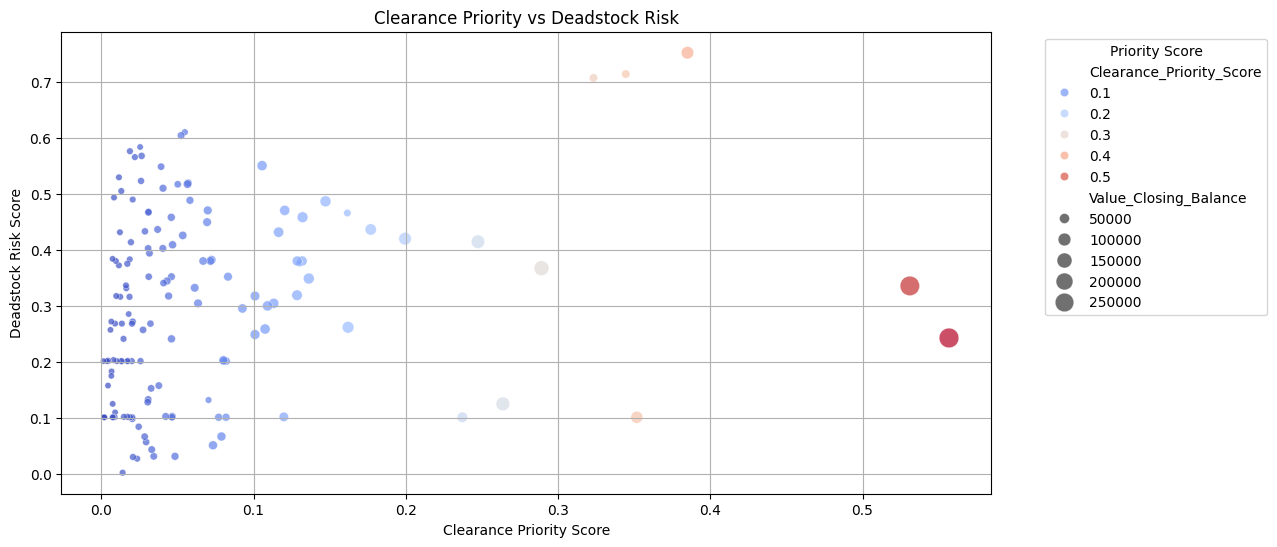

In [ ]:
overstocked_items_sorted  = overstock_items_df

# Scatter plot for Clearance Priority
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="Clearance_Priority_Score",
    y="Deadstock_Risk_Score",
    size="Value_Closing_Balance",
    hue="Clearance_Priority_Score",
    palette="coolwarm",
    data=overstocked_items_sorted,
    sizes=(20, 200),
    alpha=0.7
)
plt.title("Clearance Priority vs Deadstock Risk")
plt.xlabel("Clearance Priority Score")
plt.ylabel("Deadstock Risk Score")
plt.legend(title="Priority Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


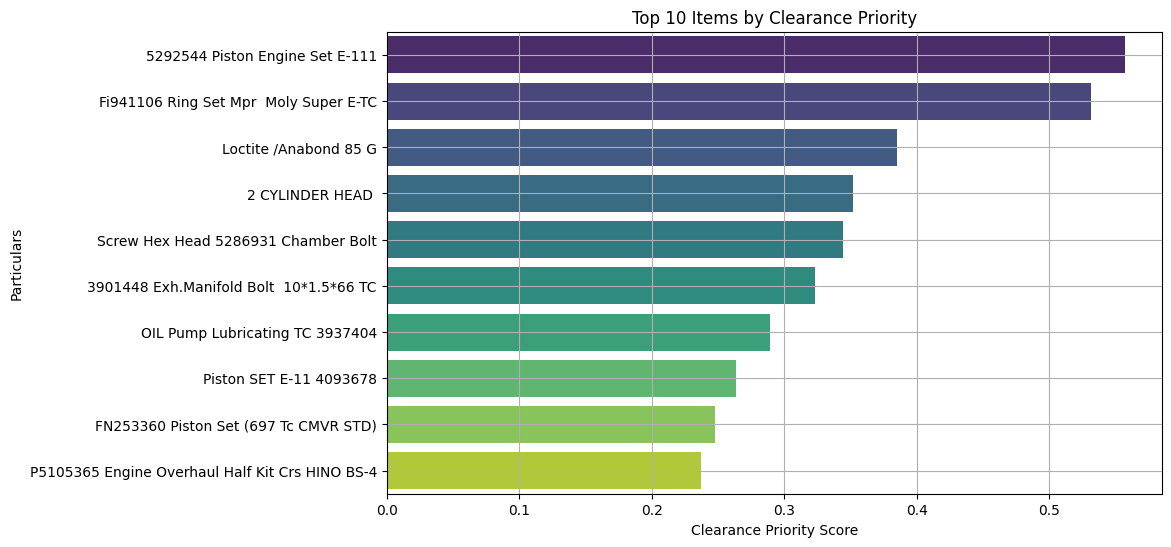

In [ ]:
# Bar chart of top 10 items with highest clearance priority
top_clearance_items = overstocked_items_sorted.nlargest(10, "Clearance_Priority_Score")
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Clearance_Priority_Score",
    y="Particulars",
    data=top_clearance_items,
    palette="viridis"
)
plt.title("Top 10 Items by Clearance Priority")
plt.xlabel("Clearance Priority Score")
plt.ylabel("Particulars")
plt.grid(True)
plt.show()


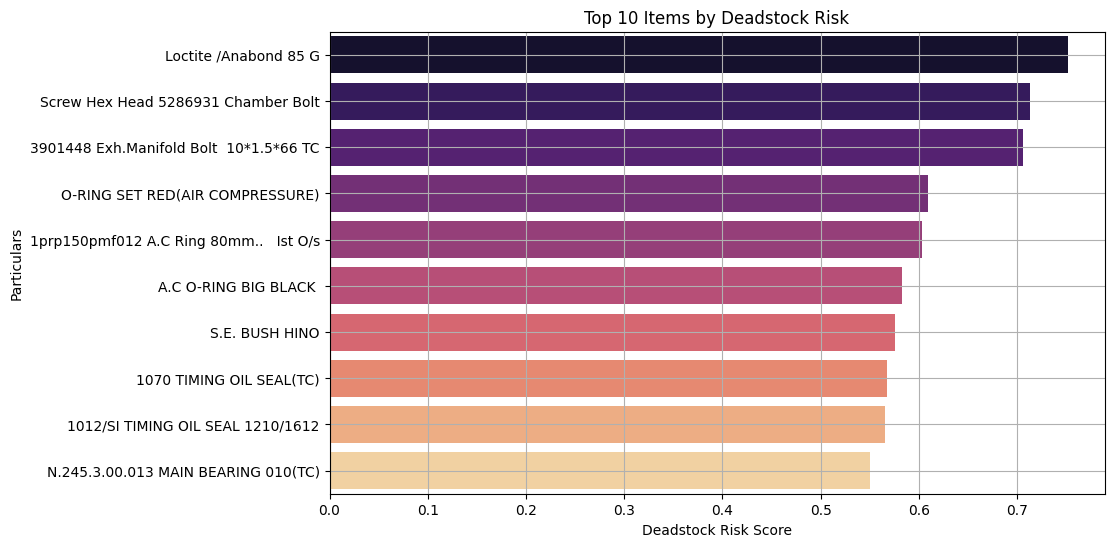

In [ ]:
# Bar chart of top 10 items with highest deadstock risk
top_deadstock_items = overstocked_items_sorted.nlargest(10, "Deadstock_Risk_Score")
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Deadstock_Risk_Score",
    y="Particulars",
    data=top_deadstock_items,
    palette="magma"
)
plt.title("Top 10 Items by Deadstock Risk")
plt.xlabel("Deadstock Risk Score")
plt.ylabel("Particulars")
plt.grid(True)
plt.show()


### Identification of Overstock Root Cause

In [ ]:
# Calculate contributions and ratios
# Opening Balance Contribution
overstocked_items_sorted['Opening_Balance_Contribution'] = overstocked_items_sorted['Quantity_Opening_Balance'] / (
    overstocked_items_sorted['Quantity_Opening_Balance'] + overstocked_items_sorted['Quantity_Inwards']
)

# Inwards-Outwards Ratio
overstocked_items_sorted['Inwards_Outwards_Ratio'] = overstocked_items_sorted['Quantity_Inwards'] / overstocked_items_sorted['Quantity_Outwards']

# Categorize items
high_opening_balance_threshold = 0.6
excessive_inwards_threshold = 2

overstocked_items_sorted['High_Opening_Balance'] = overstocked_items_sorted['Opening_Balance_Contribution'] > high_opening_balance_threshold
overstocked_items_sorted['Excessive_Inwards'] = overstocked_items_sorted['Inwards_Outwards_Ratio'] > excessive_inwards_threshold

# Quantify contributions
total_overstock = len(overstocked_items_sorted)
high_opening_balance_count = overstocked_items_sorted['High_Opening_Balance'].sum()
excessive_inwards_count = overstocked_items_sorted['Excessive_Inwards'].sum()

high_opening_balance_percentage = (high_opening_balance_count / total_overstock) * 100
excessive_inwards_percentage = (excessive_inwards_count / total_overstock) * 100



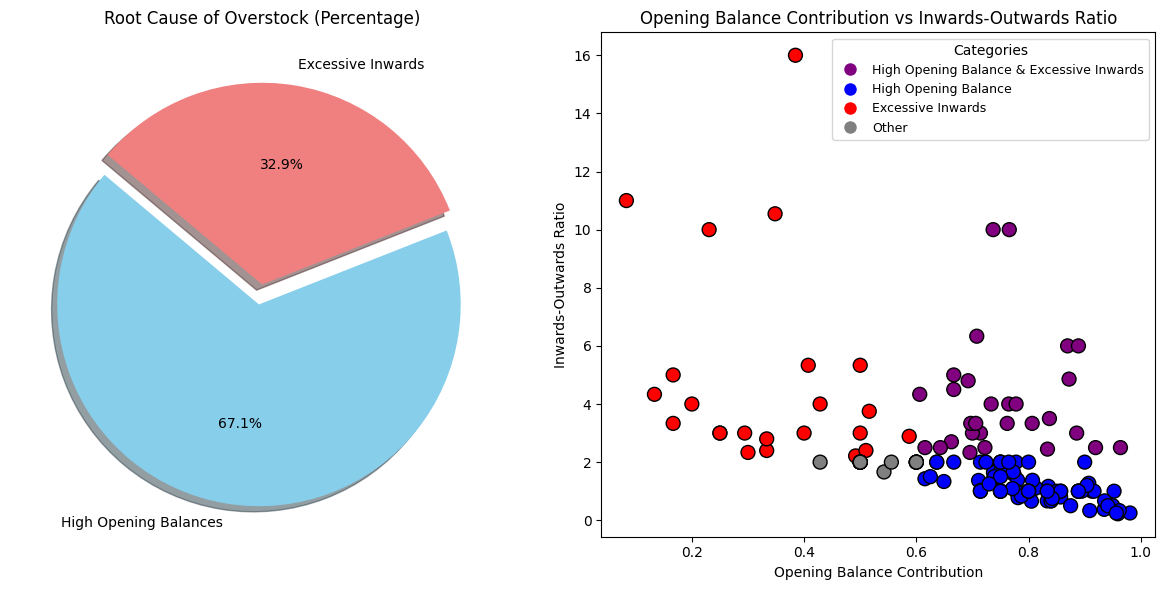

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for percentage contributions
labels = ['High Opening Balances', 'Excessive Inwards']
sizes = [high_opening_balance_percentage, excessive_inwards_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)

ax[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[0].set_title('Root Cause of Overstock (Percentage)')
overstocked_items_sorted['Color'] = np.where(overstocked_items_sorted['High_Opening_Balance'] & overstocked_items_sorted['Excessive_Inwards'], 'purple',
                       np.where(overstocked_items_sorted['High_Opening_Balance'], 'blue',
                                np.where(overstocked_items_sorted['Excessive_Inwards'], 'red', 'gray')))

# Scatter plot for individual item analysis
scatter = ax[1].scatter(overstocked_items_sorted['Opening_Balance_Contribution'], overstocked_items_sorted['Inwards_Outwards_Ratio'],
                        c=overstocked_items_sorted['Color'],
                        cmap='coolwarm', edgecolor='k', s=100)
ax[1].set_xlabel('Opening Balance Contribution')
ax[1].set_ylabel('Inwards-Outwards Ratio')
ax[1].set_title('Opening Balance Contribution vs Inwards-Outwards Ratio')

legend_labels = {
    'purple': 'High Opening Balance & Excessive Inwards',
    'blue': 'High Opening Balance',
    'red': 'Excessive Inwards',
    'gray': 'Other'
}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_labels.keys()]
ax[1].legend(handles, legend_labels.values(), title='Categories', loc='upper right', prop={'size': 9})

plt.tight_layout()
plt.show()
